In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from preprocessing import*
from model.convolutional_neural_network import *
from model.Executor import *
import warnings  
warnings.filterwarnings("ignore")

import torch.nn.functional as functional


# Training Data

The statistics on the size of our dataset.

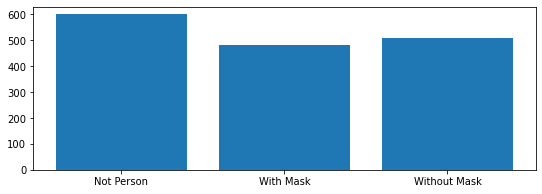

In [2]:
names = ['Not Person', 'With Mask', 'Without Mask']
N = []
N.append(len(os.listdir("./dataset/NotPerson")))
N.append(len(os.listdir("./dataset/WithMask")))
N.append(len(os.listdir("./dataset/WithoutMask")))
plt.figure(figsize=(9, 3))
plt.bar(names, N)
plt.show()

Create datasets for training and testing the model.

In [3]:
dataset = load_data("./dataset")
tr_ds, te_ds = split_data(dataset)
tr_loader = train_dataloarder(tr_ds)
te_loader = test_dataloarder(te_ds)

# Deep Learning

Implementing and training the CNN model.

In [4]:
num_epochs = 10
exec_obj = Executor()
all_loss,iter_loss,accuracy = exec_obj.training_model_executor(
    tr_loader,
    num_epochs
)


  0/10... rate=0 Hz, eta=?, total=0:00:00, wall=11:27 EST
current iter acc: 71.0218
current iter loss: 86.6502
  1/10... rate=0.04 Hz, eta=0:03:43, total=0:00:24, wall=11:27 EST
current iter acc: 89.7822
current iter loss: 70.9791
  2/10... rate=0.04 Hz, eta=0:03:14, total=0:00:48, wall=11:28 EST
current iter acc: 93.7186
current iter loss: 61.2686
  3/10... rate=0.04 Hz, eta=0:02:51, total=0:01:13, wall=11:28 EST
current iter acc: 91.5410
current iter loss: 54.8102
  4/10... rate=0.04 Hz, eta=0:02:26, total=0:01:37, wall=11:28 EST
current iter acc: 92.6298
current iter loss: 49.8585
  5/10... rate=0.04 Hz, eta=0:02:06, total=0:02:06, wall=11:29 EST
current iter acc: 95.3099
current iter loss: 46.1546
  6/10... rate=0.04 Hz, eta=0:01:41, total=0:02:32, wall=11:29 EST
current iter acc: 94.9749
current iter loss: 43.6930
  7/10... rate=0.04 Hz, eta=0:01:16, total=0:02:59, wall=11:30 EST
current iter acc: 96.8174
current iter loss: 40.4150
  8/10... rate=0.04 Hz, eta=0:00:51, total=0:03:2

In [5]:
testdata_accuracy = exec_obj.calculate_model_accuracy(te_loader)
print("Model accuracy for test dataset :",testdata_accuracy)
print(len(te_ds))

Model accuracy for test dataset : 95.22613065326632
398


# Evaluation

Confusion matrix.

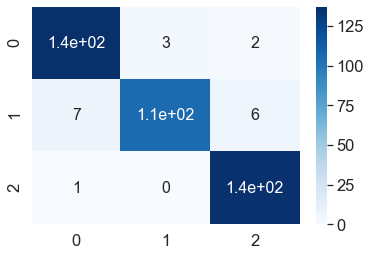

In [6]:
calc_model_weights, actual_results = next(iter(te_loader))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

Creating a table of results in order to show the accuracy, precision, recall and f1-score.

In [7]:
report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  

              precision    recall  f1-score   support

   with mask       0.94      0.96      0.95       142
without mask       0.97      0.89      0.93       119
not a person       0.94      0.99      0.97       137

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



# Saving the trained model.

In [29]:
save_path = os.path.join(os.path.abspath("."), "trained_model.pt")
torch.save(exec_obj.network.state_dict(), save_path)

exec_obj = Executor()

model = convolutional_neural_network.convolutional_neural_network()

model.load_state_dict(torch.load(save_path))

exec_obj.network = model

In [59]:
dataset_female = load_data("./test/Female")
dataset_male = load_data("./test/Male")
dataset_all = load_data("./test/All")

te_loader_female = test_dataloarder(dataset_female)
te_loader_male = test_dataloarder(dataset_male)
te_loader_all = test_dataloarder(dataset_all)

print(exec_obj.calculate_model_accuracy(te_loader_female))
print(exec_obj.calculate_model_accuracy(te_loader_male))
print(exec_obj.calculate_model_accuracy(te_loader_all))



88.75
90.41666666666667
91.76470588235294
